# Term Deposit Marketing - An Apziva Project

By Samuel Alter

Apziva: G3SuQYZYrFt9dwF3

## Project Overview

Using phone call data from a European bank, this project will be building a model that predicts if a customer will subscribe to a term deposit, a type of financial product. This project is a partnership with a startup focused on providing ML solutions for European banks.

### Goals

The startup is hoping that I can **achieve ≥81% accuracy** using a 5-fold cross validation strategy, taking the average performance score.

Bonus goals include:
* Determining which customers are most likely to buy the term deposit loan
  * Which segments of customers should the client prioritize?
* Determine what makes the customer buy the loan
  * Which feature should the startup focus on?

### The dataset

Using phone call data from a European bank, this project will be building models that predict if a customer will subscribe to a term deposit, a type of financial product. This project is a partnership with a startup focused on providing ML solutions for European banks.

The dataset consists of the following columns:
* `age`
  * Numeric
  * The age of the customer
* `job`
  * Categorical
  * The job category of the customer
* `marital`
  * Categorical
  * Whether the customer is married
* `education`
  * Categorical
  * The customer's level of education
* `default`
  * Binary
  * If the customer has credit in default or not
* `balance`
  * Numeric
  * Average yearly balance in Euros
* `housing`
  * Binary
  * If the customer has a housing loan or not
* `loan`
  * Binary
  * If the customer has a personal loan
* `contact`
  * Categorical
  * The type of contact communication
* `day`
  * Numeric
  * Last contact day of the month
* `month`
  * Categorical
  * Last contact month of the year
* `duration`
  * Numeric
  * Duration of the last phone call with the customer
* `campaign`
  * Numeric
  * The number of contacts performed during this campaign and for this client, which includes the last contact

The final column, `y`, is the target of the dataset and shows whether the client subscribed to a term deposit.

## Table of Contents

1. [EDA](#eda)
 * [Non-visual data analysis](#neda) of the data: check `dtype`, look at broad trends in data
 * [Visualization](#viz) of the data
   * [Figure 1: Barplots of **categorical** features](#fig1)
   * [Figure 2: Histograms of **continuous** features](#fig2)
   * [Figure 3: Boxplots of **continuous** features](#fig3)
   * [Figure 4: Correlation matrix of **continuous** features](#fig4)
   * [Figure 5: Correlation matrix of **categorical** features](#fig5)
   * What about [scatterplots?](#scat)
2. [Modeling](#mod)

## Imports and Helper Functions

In [29]:
# ignore warnings for seaborn
import warnings
warnings.filterwarnings("ignore", module="seaborn")

In [30]:
!pip install pycaret

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from scipy.stats import chi2_contingency

# from pycaret.classification import *

In [32]:
# import json
# from datetime import datetime
# from pathlib import Path
# import inspect

# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.metrics import roc_curve,auc,roc_auc_score

# from xgboost import XGBClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression

# import lightgbm as lgb
# from lightgbm import LGBMClassifier
# from lightgbm import plot_importance

# from sklearn.ensemble import StackingClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.model_selection import RepeatedStratifiedKFold
# from numpy import mean
# from numpy import std

In [33]:
# simple function to generate random integers

def rand_gen(low=1,high=1e4):
    '''
    Generates a pseudo-random integer
    consisting of up to four digits
    '''
    rng=np.random.default_rng()
    random_state=int(rng.integers(low=low,high=high))
    return random_state

In [34]:
def get_variable_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [name for name, val in callers_local_vars if val is var]

def fileDaterSaver(location: str,
                   filetype: str,
                   object_,
                   extra: str = '',
                   verbose: bool = True):

    '''
    Function that gets a timestamped filename and saves it
    to a user-specified location.

    Parameters:
    -----------
    location: str - The location where the file will be saved.
    filetype: str - The type of the file to save ('csv' or 'json').
    object_: The object to be saved. Should be a pandas DataFrame
        for 'csv' or serializable for 'json'.
    extra: str - Additional string to include in the filename.
    verbose: bool - Whether to print verbose messages.
    '''

    # get current date and time
    current_datetime = datetime.now()

    # print current date and time to check
    if verbose:
        print('current_datetime:', current_datetime)

    # format the datetime for a filename
    datetime_suffix = current_datetime.strftime("%Y-%m-%d_%H-%M-%S")

    # create filename with the datetime suffix
    if extra != '':
        file_name = f'{location}{extra}_{datetime_suffix}.{filetype}'
    else:
        file_name = f'{location}{datetime_suffix}.{filetype}'

    # print file name
    if verbose:
        print(file_name)

    # save object
    if filetype == 'csv':
        object_.to_csv(file_name, index=True)
    elif filetype == 'json':
        with open(file_name, 'w') as file:
            file.write(json.dumps(object_, default=str))
    else:
        raise ValueError("Unsupported file type. Use 'csv' or 'json'.")

    # confirm save
    file_path = Path(file_name)
    if file_path.exists():
        variable_name = get_variable_name(object_)
        if variable_name:
            print(f'Successfully saved {variable_name[0]} to {file_path}')
        else:
            print(f'Successfully saved object to {file_path}')
    else:
        print("File save error.")

## EDA <a name='eda'></a>

### Non-visual data analysis <a name='neda'></a>

In [35]:
# from google.colab import files
# uploaded=files.upload()

In [36]:
# df=pd.read_csv('2_data.csv')
# df.head(3)

In [37]:
# if not in Google Colab:

# read in data
df=pd.read_csv('../data/2_data.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no


In [38]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 40000 rows and 14 columns in the dataset


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


There are no nulls in the dataset, which makes our lives easier.

In [40]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


We can glean the following insights from this table:
* The mean values for the `age`, `day`, and `campaign` columns are about equal to the 50th percentile
  * The distribution of the data may be symmetric
* The max value in each column besides `age` and `day` is much larger than the column's 75th percentile
  * This suggests there could be outliers
  * `age` and `day` are more or less categorical, so it makes sense that the max age is 95 and max day is 31

What if we compare the subset of the data that had a positive `y` outcome to those that had a negative outcome?

In [41]:
# customers in the dataset who did get a loan
df_yes = df[df['y'] == 'yes']
df_yes.describe()

,age,balance,day,duration,campaign
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000
mean,39.844959,1588.495856,15.827003,682.958564,2.414365
std,11.001984,2924.894429,8.557604,431.287174,2.306015
min,19.000000,-3058.000000,1.000000,8.000000,1.000000
25%,31.000000,141.000000,8.000000,364.000000,1.000000
50%,37.000000,620.000000,16.000000,629.000000,2.000000
75%,47.000000,1820.500000,22.000000,913.000000,3.000000
max,95.000000,45248.000000,31.000000,3881.000000,32.000000


In [42]:
# customers in the dataset who did not get a loan
df_no = df[df['y'] == 'no']
df_no.describe()

,age,balance,day,duration,campaign
count,37104.000000,37104.000000,37104.000000,37104.000000,37104.000000
mean,40.599208,1249.752533,16.032072,221.408042,2.918688
std,9.525450,2900.722436,8.255850,206.360022,3.298031
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,50.000000,8.000000,95.000000,1.000000
50%,39.000000,395.000000,17.000000,164.000000,2.000000
75%,48.000000,1286.000000,21.000000,280.000000,3.000000
max,94.000000,102127.000000,31.000000,4918.000000,63.000000


In [43]:
print(f"{df_yes.shape[0]/df.shape[0]*100}% of the dataset has positive outcomes, while {round(df_no.shape[0]/df.shape[0]*100,2)}% of the dataset has negative outcomes")

7.24% of the dataset has positive outcomes, while 92.76% of the dataset has negative outcomes


We can see:
* There is a large class imbalance in the dataset
* The mean values are roughly the same across the numerical columns and loan outcomes
  * Except for duration, which is about 3x as less for calls that don't end with a sale (`y`=no)
* The max values for `balance` and `campaign` are about 2.25x and 2x as large for `y`=no

Let's do some more aggregations to tease apart the differences between the different classes within each column.

In [44]:
# functions to compute the quantiles

def q25(x):
    return x.quantile(0.25)

def q50(x):
    return x.quantile(0.50)

def q75(x):
    return x.quantile(0.75)

def iqr(x):
    return q75(x)-q25(x)

We can edit this code to slice and dice the dataset as we please:

In [45]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [46]:
groupby_list=['count','mean','std','min',q25,q50,q75,iqr]
df.groupby([
    # 'age',
    'job',
    # 'marital',
    # 'education',
    # 'default',
    # 'housing',
    # 'loan',
    # 'contact',
    # 'day',
    # 'month',
    # 'y'
]).agg(
    {
        'balance':groupby_list,
        # 'duration':groupby_list,
        # 'campaign':groupby_list
    })

balance                                                         \
                count         mean          std   min     q25    q50     q75   
job                                                                            
admin            4483  1071.794111  2633.643058 -1601   44.50  375.0  1114.0   
blue-collar      9383  1056.803155  2206.054343 -8019   51.00  377.0  1158.5   
entrepreneur     1405  1452.220641  3922.060541 -2082   37.00  341.0  1249.0   
housemaid        1087  1327.157314  2939.895734 -1941   50.00  390.0  1334.5   
management       8166  1688.052902  3849.616616 -6847   72.00  518.0  1691.0   
retired          1437  1513.709116  3133.081518 -1598   79.00  514.0  1640.0   
self-employed    1414  1513.509194  3235.335044 -3313   96.25  472.0  1498.0   
services         3910   977.701279  2163.973389 -2122   28.00  324.0  1045.0   
student           524  1288.769084  2412.317764  -679  140.75  478.0  1444.0   
technician       6852  1193.454320  2526.033389 -2827   49.00  387.5  1228.5   
unemployed       1104  1446.983696  3001.613418 -1270   75.00  487.5  1592.5   
unknown           235  1677.391489  2887.377673  -295  130.50  666.0  2093.5   

                        
                   iqr  
job                     
admin          1069.50  
blue-collar    1107.50  
entrepreneur   1212.00  
housemaid      1284.50  
management     1619.00  
retired        1561.00  
self-employed  1401.75  
services       1017.00  
student        1303.25  
technician     1179.50  
unemployed     1517.50  
unknown        1963.00

There are different mean balances depending on what job the customer is in, which is to be expected: a blue-collar worker is not typically making the same amount of money that someone in management makes, so the balance in their bank account would be different too.

In [47]:
# create dictionary of unique values
dict_unique={col:df[col].nunique() for col in df.columns}

# this is a little unwieldy
# but it will give us a sense of
# HOW MANY unique values there are
dict_unique

{'age': 70,
 'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'balance': 6849,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'day': 31,
 'month': 11,
 'duration': 1535,
 'campaign': 48,
 'y': 2}

We can tell which columns are categorical. For example, there are...
* 12 kinds of jobs
* 4 education levels  

...in the datset

In [48]:
# create dictionary of unique values
dict_nunique={col:df[col].unique() for col in df.columns}

# this is a little unwieldy
# but it will give us a sense of
# WHAT the unique values are
dict_nunique

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81]),
 'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([  2143,     29,      2, ...,   7222,   3402, 102127]),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object),
 'day': array([ 5,  6,  7,  8

Nothing too surprising jumps out at us here, so we'll need to use more... _visual_ methods to understand the dataset.

### Visualization <a name='viz'></a>

#### Figure 1: Barplots of Categorical features <a name='fig1'></a>

Make a big figure with all the categorical features:
* `job`
* `marital`
* `education`
* `default`
* `housing`
* `loan`
* `contact`
* `day`
* `month`

In [49]:
# make dictionary of just the categorical variables
cat_nunique=copy.deepcopy(dict_nunique)
del cat_nunique['age']
del cat_nunique['balance']
del cat_nunique['duration']
del cat_nunique['campaign']
del cat_nunique['y']
cat_nunique={key: sorted(value) for key, value in cat_nunique.items()}
print(cat_nunique)

{'job': ['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'], 'marital': ['divorced', 'married', 'single'], 'education': ['primary', 'secondary', 'tertiary', 'unknown'], 'default': ['no', 'yes'], 'housing': ['no', 'yes'], 'loan': ['no', 'yes'], 'contact': ['cellular', 'telephone', 'unknown'], 'day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'month': ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct']}


In [50]:
job_order=list(df['job'].unique())
job_order.sort()
job_order

['admin',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown']

In [51]:
cat_nunique['month']=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

/var/folders/n3/q8wb235x57n_sx2q14dsngjr0000gn/T/ipykernel_73586/1070717384.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.countplot(data=df_no,x=col,palette='colorblind', dodge=True, order=order,ax=axes[i*2])
/var/folders/n3/q8wb235x57n_sx2q14dsngjr0000gn/T/ipykernel_73586/1070717384.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df_yes,x=col,palette='colorblind',dodge=True,order=order,ax=axes[i*2 + 1])
/var/folders/n3/q8wb235x57n_sx2q14dsngjr0000gn/T/ipykernel_73586/1070717384.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a

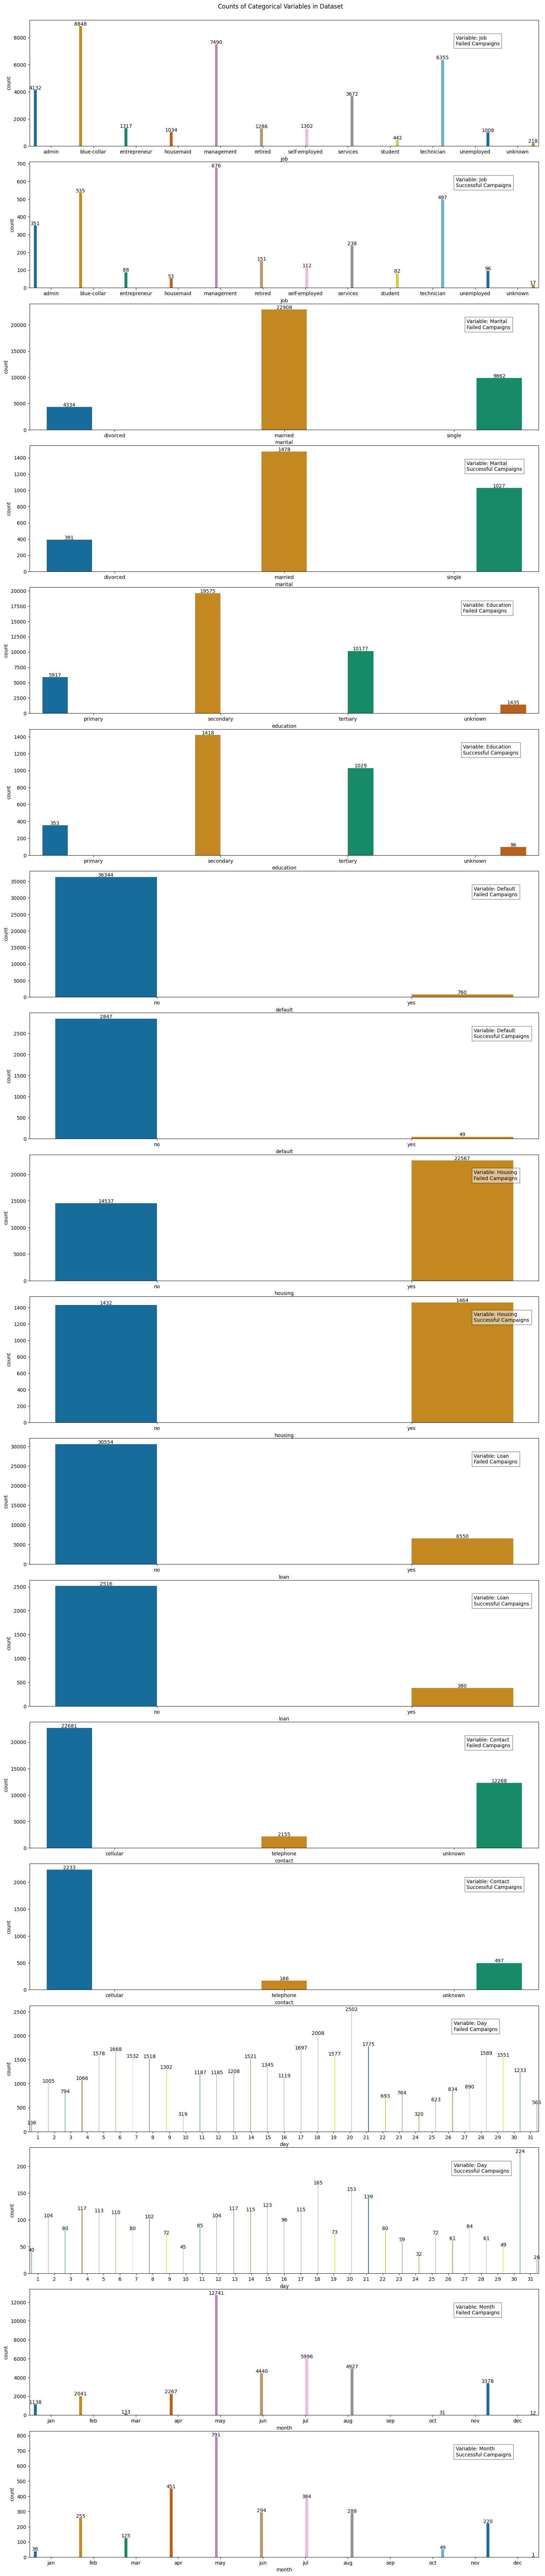

In [52]:
# get total number of plots
num_plots=len(cat_nunique)*2

# create subplots
fig,axes=plt.subplots(num_plots,1,figsize=(15,num_plots*4))
plt.suptitle(t='Counts of Categorical Variables in Dataset',y=.999)
plt.tight_layout()

# flatten axes for easy indexing
axes=axes.flatten()

# plot each column
for i, (col, order) in enumerate(cat_nunique.items()):
#     plot 'no' part
    ax1=sns.countplot(data=df_no,x=col,palette='colorblind', dodge=True, order=order,ax=axes[i*2])
    # ax1.set_title(f'{col.capitalize()} Distribution for Failed Campaigns')
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 4),
                     textcoords = 'offset points')
    ax1.text(ax1.get_xlim()[1]+(ax1.get_xlim()[1])*(-0.17),
             ax1.get_ylim()[1] - (ax1.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nFailed Campaigns', bbox=dict(facecolor='white', alpha=0.5))

    # Plot 'yes' part
    ax2 = sns.countplot(data=df_yes,x=col,palette='colorblind',dodge=True,order=order,ax=axes[i*2 + 1])
    # ax2.set_title(f'{col.capitalize()} Distribution for Successful Campaigns')
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 4),
                     textcoords = 'offset points')
    ax2.text(ax2.get_xlim()[1]+(ax2.get_xlim()[1])*(-0.17),
             ax2.get_ylim()[1] - (ax2.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nSuccessful Campaigns', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('../figs/2_countcategorical.pdf')
plt.savefig('../figs/2_countcategorical.png')
plt.show()

There is a lot to observe here, but note that although the values differ drastically between successful and failed campaigns, the patterns are similar for most of the features.

Also notable is that there were no calls made to customers in the month of September.

#### Figure 2: Histograms of Continuous Features <a name='fig2'></a>

In [53]:
# make dictionary of just the categorical variables
num_nunique=copy.deepcopy(dict_nunique)
del num_nunique['job']
del num_nunique['marital']
del num_nunique['education']
del num_nunique['default']
del num_nunique['housing']
del num_nunique['loan']
del num_nunique['contact']
del num_nunique['day']
del num_nunique['month']
del num_nunique['y']
num_nunique

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81]),
 'balance': array([  2143,     29,      2, ...,   7222,   3402, 102127]),
 'duration': array([ 261,  151,   76, ..., 1880, 1460, 2219]),
 'campaign': array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
        32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
        20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])}

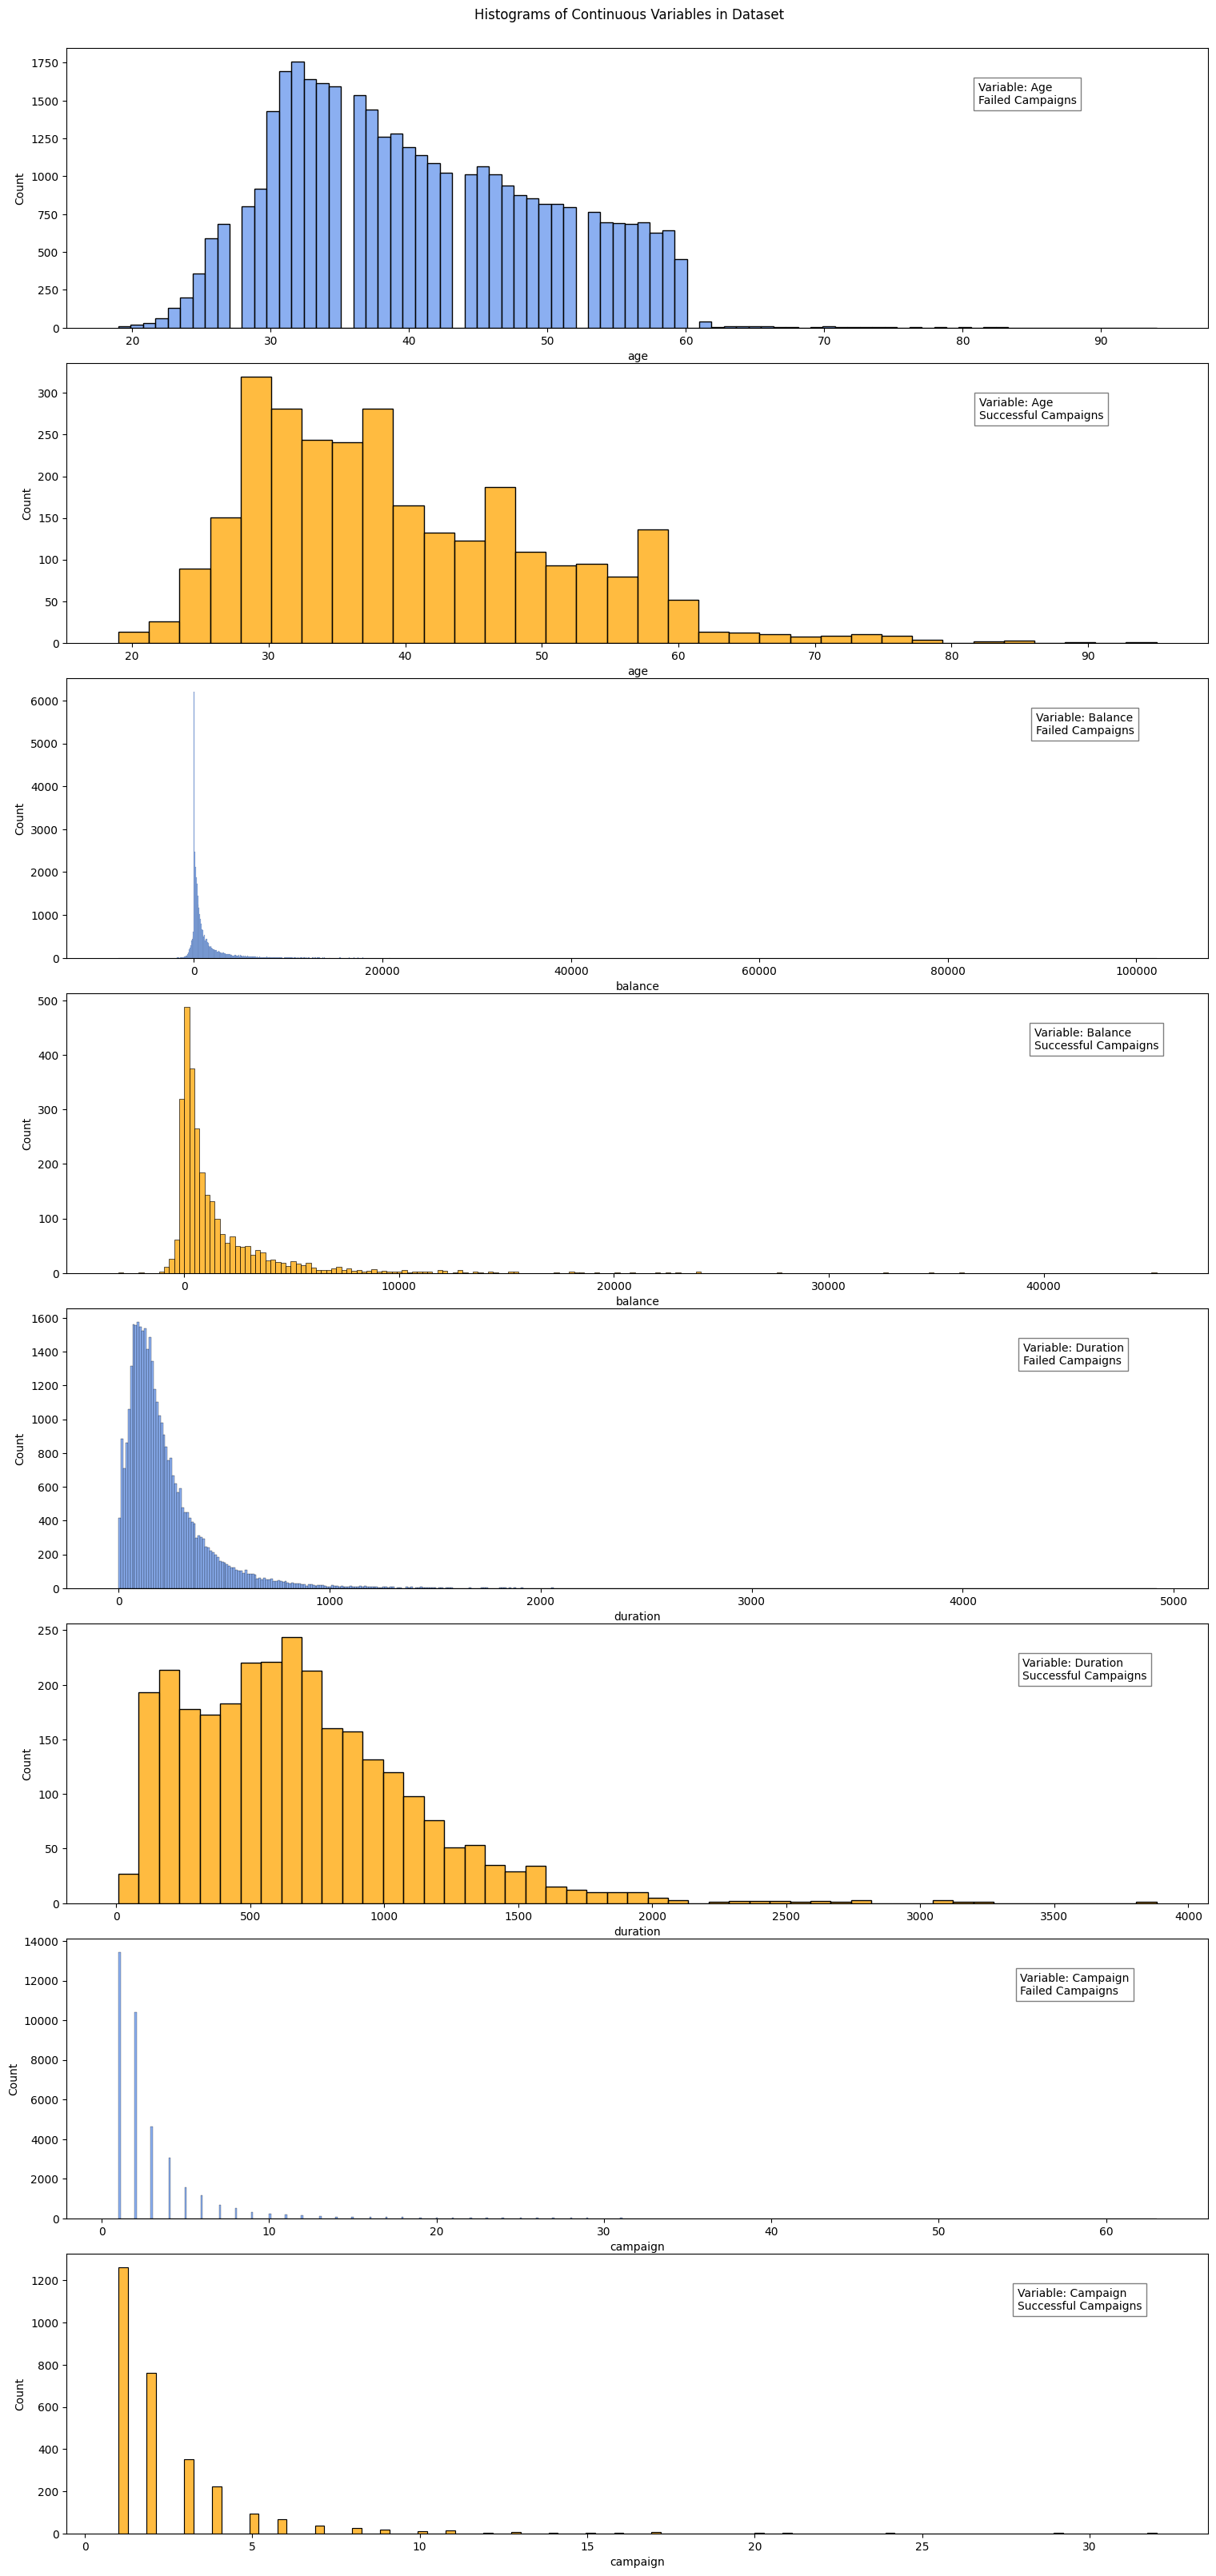

In [55]:
# get total number of plots
num_plots=len(num_nunique)*2

# create subplots
fig,axes=plt.subplots(num_plots,1,figsize=(15,num_plots*4))
plt.suptitle(t='Histograms of Continuous Variables in Dataset',y=.999)
plt.tight_layout()

# flatten axes for easy indexing
axes=axes.flatten()

# plot each column
for i, (col, order) in enumerate(num_nunique.items()):
#     plot 'no' part
    ax1=sns.histplot(data=df_no,x=col,color='cornflowerblue',ax=axes[i*2])
    ax1.text(ax1.get_xlim()[1]+(ax1.get_xlim()[1])*(-0.17),
             ax1.get_ylim()[1] - (ax1.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nFailed Campaigns', bbox=dict(facecolor='white', alpha=0.5))

    # Plot 'yes' part
    ax2 = sns.histplot(data=df_yes,x=col,color='orange',ax=axes[i*2 + 1])
    ax2.text(ax2.get_xlim()[1]+(ax2.get_xlim()[1])*(-0.17),
             ax2.get_ylim()[1] - (ax2.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nSuccessful Campaigns', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('../figs/2_histograms.pdf')
plt.savefig('../figs/2_histograms.png')

The patterns between successful and failed campaigns' continuous data are mostly similar, although the X and Y axes are different. The one feature that I see is different is the distribution for duration for successful campaigns is wider than those for failed campaigns. Boxplots may clear this up for us.

#### Figure 3: Boxplots of Continuous Features <a name='fig3'></a>

In [36]:
order

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81])

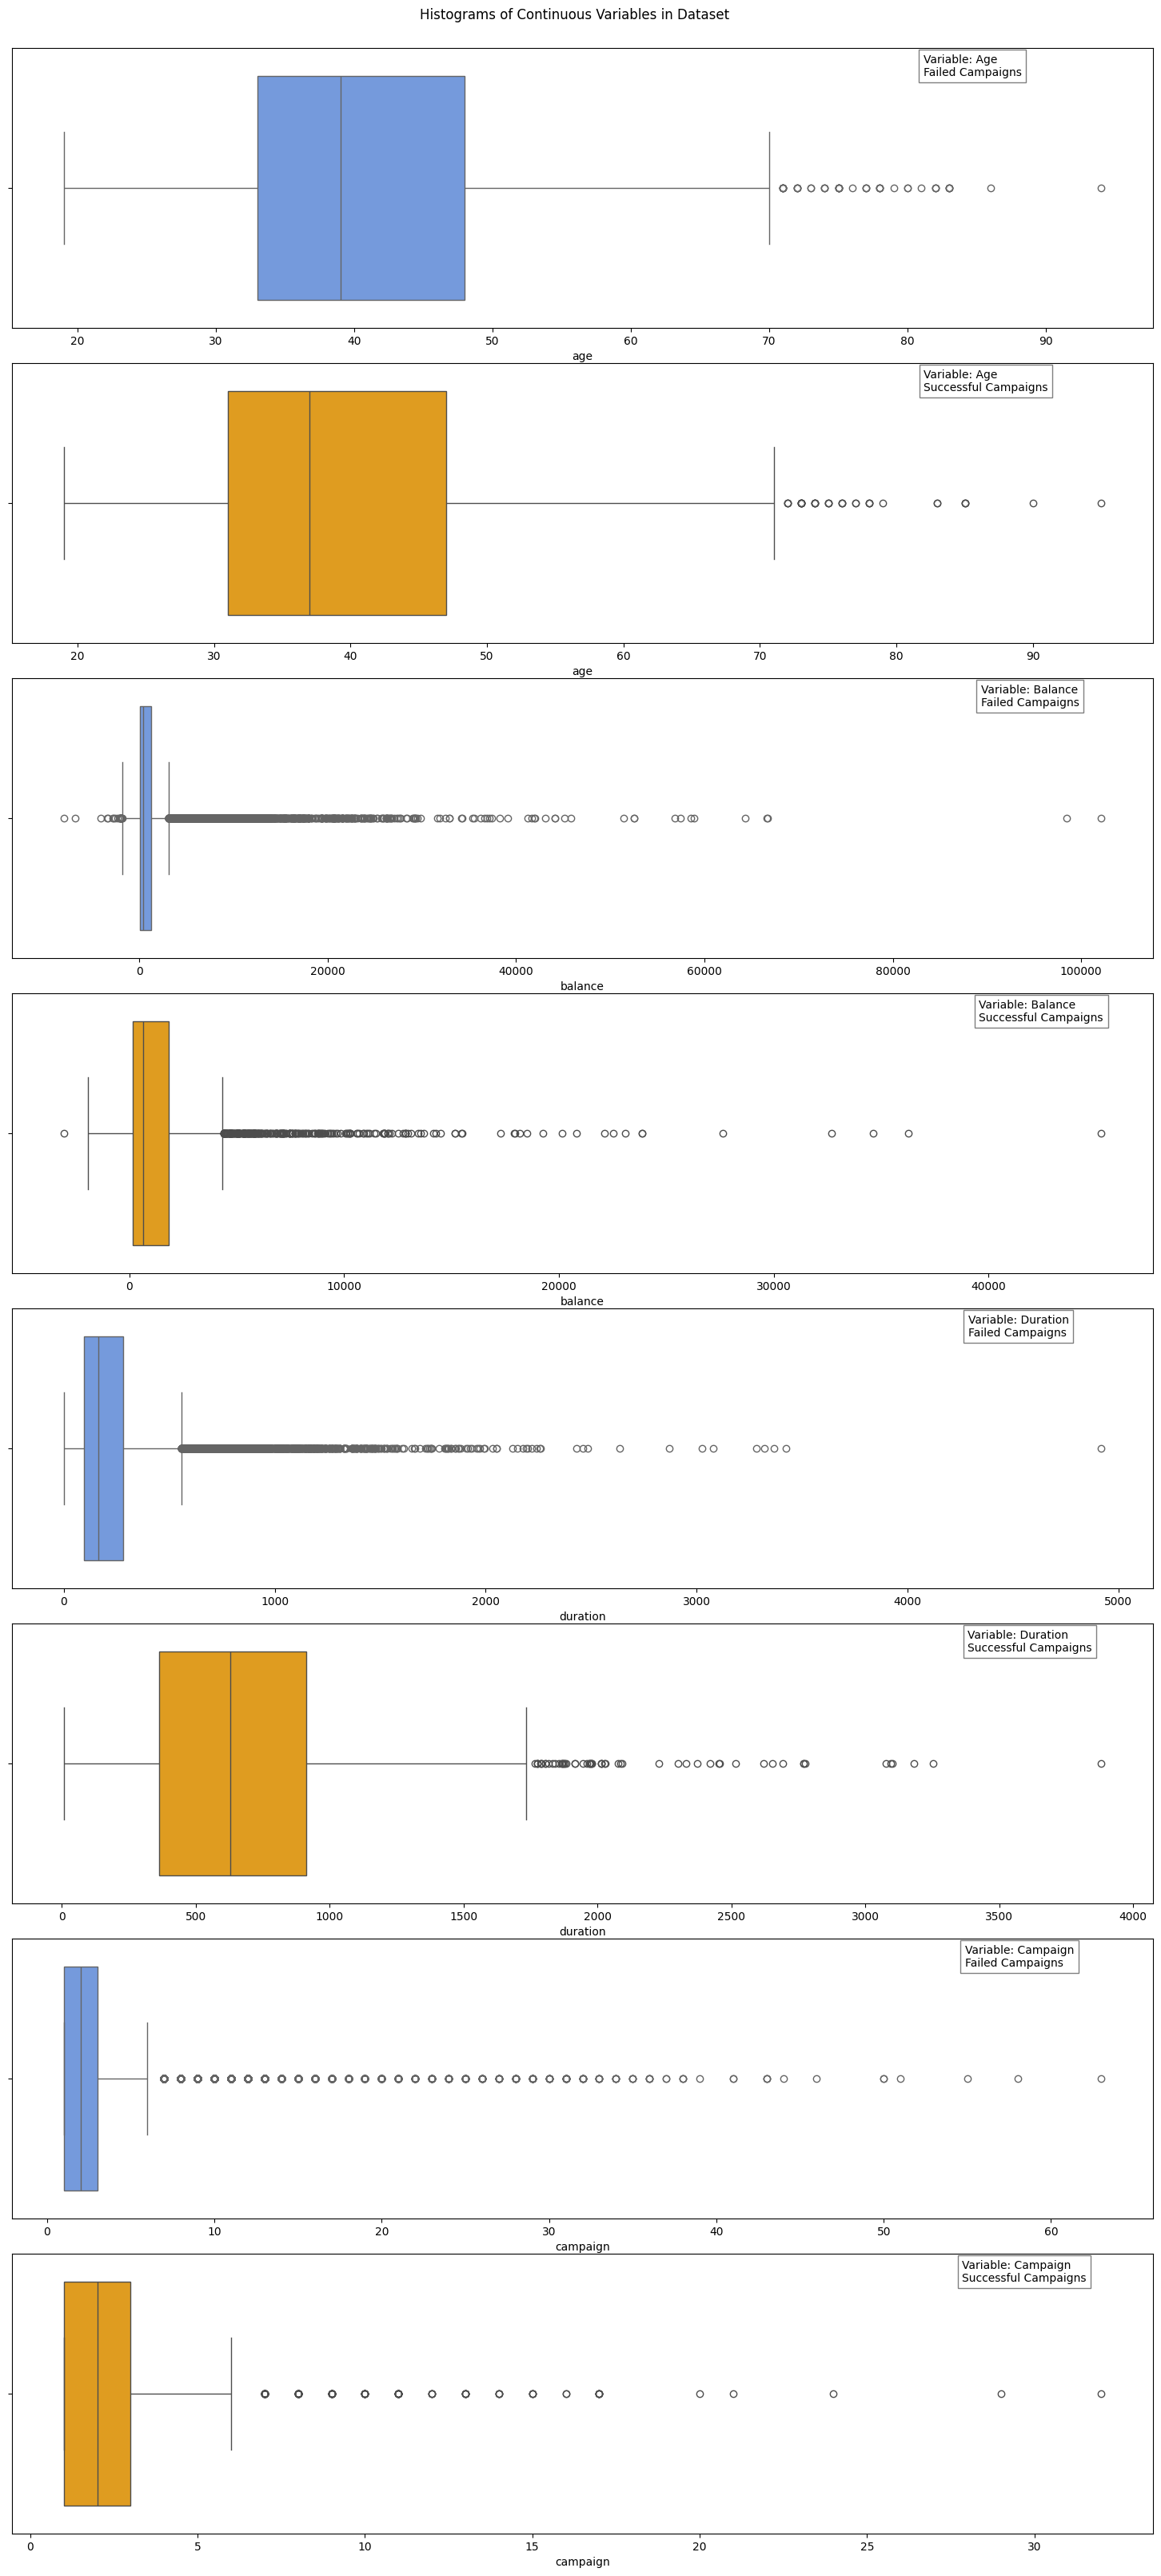

In [60]:
# get total number of plots
num_plots=len(num_nunique)*2

# create subplots
fig,axes=plt.subplots(num_plots,1,figsize=(15,num_plots*4))
plt.suptitle(t='Histograms of Continuous Variables in Dataset',y=.999)
plt.tight_layout()

# flatten axes for easy indexing
axes=axes.flatten()

# plot each column
for i, (col, order) in enumerate(num_nunique.items()):
#     plot 'no' part
    ax1=sns.boxplot(data=df_no,x=col,color='cornflowerblue',ax=axes[i*2])
    ax1.text(ax1.get_xlim()[1]+(ax1.get_xlim()[1])*(-0.17),
             ax1.get_ylim()[1] - (ax1.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nFailed Campaigns', bbox=dict(facecolor='white', alpha=0.5))

    # Plot 'yes' part
    ax2 = sns.boxplot(data=df_yes,x=col,color='orange',ax=axes[i*2 + 1])
    ax2.text(ax2.get_xlim()[1]+(ax2.get_xlim()[1])*(-0.17),
             ax2.get_ylim()[1] - (ax2.get_ylim()[1])*(1/5),
             f'Variable: {col.capitalize()}\nSuccessful Campaigns', bbox=dict(facecolor='white', alpha=0.5))

plt.savefig('../figs/2_boxplots.pdf')
plt.savefig('../figs/2_boxplots.png')

In [61]:
# # get total number of plots
# num_plots=len(num_nunique)

# # create subplots for 'no' part
# fig_no, axes_no = plt.subplots(num_plots, 1, figsize=(15, num_plots * 4))
# fig_no.suptitle('Boxplots of Continuous Variables in Dataset (Failed Campaigns)', y=0.999)
# plt.tight_layout()

# # create subplots for 'yes' part
# fig_yes, axes_yes = plt.subplots(num_plots, 1, figsize=(15, num_plots * 4))
# fig_yes.suptitle('Boxplots of Continuous Variables in Dataset (Successful Campaigns)', y=0.999)
# plt.tight_layout()

# # flatten axes for easy indexing
# axes_no = axes_no.flatten()
# axes_yes = axes_yes.flatten()

# # plot each column
# for i, (col, order) in enumerate(num_nunique.items()):
#     # plot 'no' part
#     sns.boxplot(data=df_no, x=col, color='cornflowerblue', ax=axes_no[i])
#     axes_no[i].text(axes_no[i].get_xlim()[1] + (axes_no[i].get_xlim()[1]) * (-0.17),
#                     axes_no[i].get_ylim()[1] - (axes_no[i].get_ylim()[1]) * (1 / 2),
#                     f'Variable: {col.capitalize()}\nFailed Campaigns', bbox=dict(facecolor='white', alpha=0.5))

#     # plot 'yes' part
#     sns.boxplot(data=df_yes, x=col, color='orange', ax=axes_yes[i])
#     axes_yes[i].text(axes_yes[i].get_xlim()[1] + (axes_yes[i].get_xlim()[1]) * (-0.17),
#                      axes_yes[i].get_ylim()[1] - (axes_yes[i].get_ylim()[1]) * (1 / 2),
#                      f'Variable: {col.capitalize()}\nSuccessful Campaigns', bbox=dict(facecolor='white', alpha=0.5))

#     # ensure x-axis limits are the same
#     xlim = [min(axes_no[i].get_xlim()[0], axes_yes[i].get_xlim()[0]), max(axes_no[i].get_xlim()[1], axes_yes[i].get_xlim()[1])]
#     axes_no[i].set_xlim(xlim)
#     axes_yes[i].set_xlim(xlim)

# plt.show()


In [62]:
# # get total number of plots
# num_plots=len(num_nunique)*2

# # create subplots
# fig,axes=plt.subplots(num_plots,1,figsize=(15,num_plots*4))
# plt.suptitle(t='Boxplots of Continuous Variables in Dataset',y=.999)
# plt.tight_layout()

# # flatten axes for easy indexing
# axes=axes.flatten()

# # plot each column
# for i, (col, order) in enumerate(num_nunique.items()):
#     # plot 'no' part
#     ax1=sns.boxplot(data=df_no,x=col,color='cornflowerblue',dodge=True,ax=axes[i*2])#order=order,ax=axes[i*2])
#     ax1.text(ax1.get_xlim()[1]+(ax1.get_xlim()[1])*(-0.17),
#              ax1.get_ylim()[1] - (ax1.get_ylim()[1])*(1/2),
#              f'Variable: {col.capitalize()}\nFailed Campaigns',bbox=dict(facecolor='white', alpha=0.5))

#     # plot 'yes' part
#     ax2 = sns.boxplot(data=df_yes,x=col,color='orange',dodge=True,ax=axes[i*2])#order=order,ax=axes[i*2+1])
#     ax2.text(ax2.get_xlim()[1]+(ax2.get_xlim()[1])*(-0.17),
#              ax2.get_ylim()[1] - (ax2.get_ylim()[1])*(1/2),
#              f'Variable: {col.capitalize()}\nSuccessful Campaigns',bbox=dict(facecolor='white', alpha=0.5))

#     # ensure x-axis limits are the same
#     xlim = [min(ax1.get_xlim()[0], ax2.get_xlim()[0]), max(ax1.get_xlim()[1], ax2.get_xlim()[1])]
#     ax1.set_xlim(xlim)
#     ax2.set_xlim(xlim)

In [63]:
# # get total number of plots
# num_plots=len(num_nunique)*2

# # create subplots
# fig,axes=plt.subplots(num_plots,1,figsize=(15,num_plots*4))
# plt.suptitle(t='Boxplots of Continuous Variables in Dataset',y=.999)
# plt.tight_layout()

# # flatten axes for easy indexing
# axes=axes.flatten()

# # plot each column
# for i, (col, order) in enumerate(num_nunique.items()):
#     # plot 'no' part
#     ax1=sns.boxplot(data=df_no,x=col,color='cornflowerblue',dodge=True,order=order,ax=axes[i*2])
#     ax1.text(ax1.get_xlim()[1]+(ax1.get_xlim()[1])*(-0.17),
#              ax1.get_ylim()[1] - (ax1.get_ylim()[1])*(1/2),
#              f'Variable: {col.capitalize()}\nFailed Campaigns',bbox=dict(facecolor='white', alpha=0.5))

#     # plot 'yes' part
#     ax2 = sns.boxplot(data=df_yes,x=col,color='orange',dodge=True,order=order,ax=axes[i*2+1])
#     ax2.text(ax2.get_xlim()[1]+(ax2.get_xlim()[1])*(-0.17),
#              ax2.get_ylim()[1] - (ax2.get_ylim()[1])*(1/2),
#              f'Variable: {col.capitalize()}\nSuccessful Campaigns',bbox=dict(facecolor='white', alpha=0.5))

#     # ensure x-axis limits are the same
#     xlim = [min(ax1.get_xlim()[0], ax2.get_xlim()[0]), max(ax1.get_xlim()[1], ax2.get_xlim()[1])]
#     ax1.set_xlim(xlim)
#     ax2.set_xlim(xlim)

Duration does indeed seem different, though recall that this feature is describing how long the last phone call was with the customer. It may not tell us that much.

#### Figure 4: Correlation Matrix of Continuous Features <a name='fig4'></a>

In [65]:
df_num=df[['age','balance','duration','campaign']]

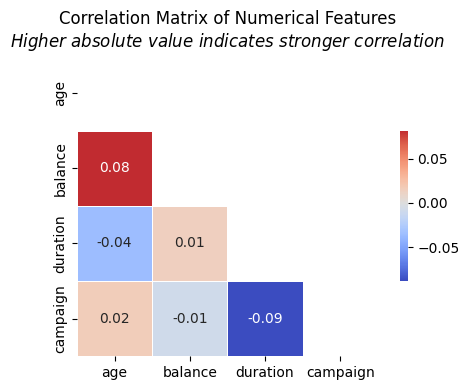

In [66]:
# compute correlation matrix
corr=df_num[['age','balance','duration','campaign']].corr()

# generate mask for the upper triangle
mask=np.triu(np.ones_like(corr, dtype=bool))

# set up matplotlib figure
f,ax = plt.subplots(figsize=(5, 4))

# draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap='coolwarm',#vmax=1,vmin=-1,
            center=0,
            square=True,linewidths=.5,annot=True,
            fmt='.2f',cbar_kws={"shrink":.5})
plt.title('Correlation Matrix of Numerical Features\n$Higher$ $absolute$ $value$ $indicates$ $stronger$ $correlation$')
plt.tight_layout()

# save fig
plt.savefig('../figs/2_corrmatrix_num.pdf')
plt.savefig('../figs/2_corrmatrix_num.png')

It's good to see that there are no strong correlations with the numerical data. `age`:`balance` makes sense because as you age, you will have had a longer time to accrue more money.

Let's now look at the categorical data now:

#### Figure 5: Correlation Matrix of Categorical Features <a name='fig5'></a>

In [68]:
# make a df of just the categorical values
df_cat=df[['job','marital','education','default','housing','loan','contact','day','month','y']]

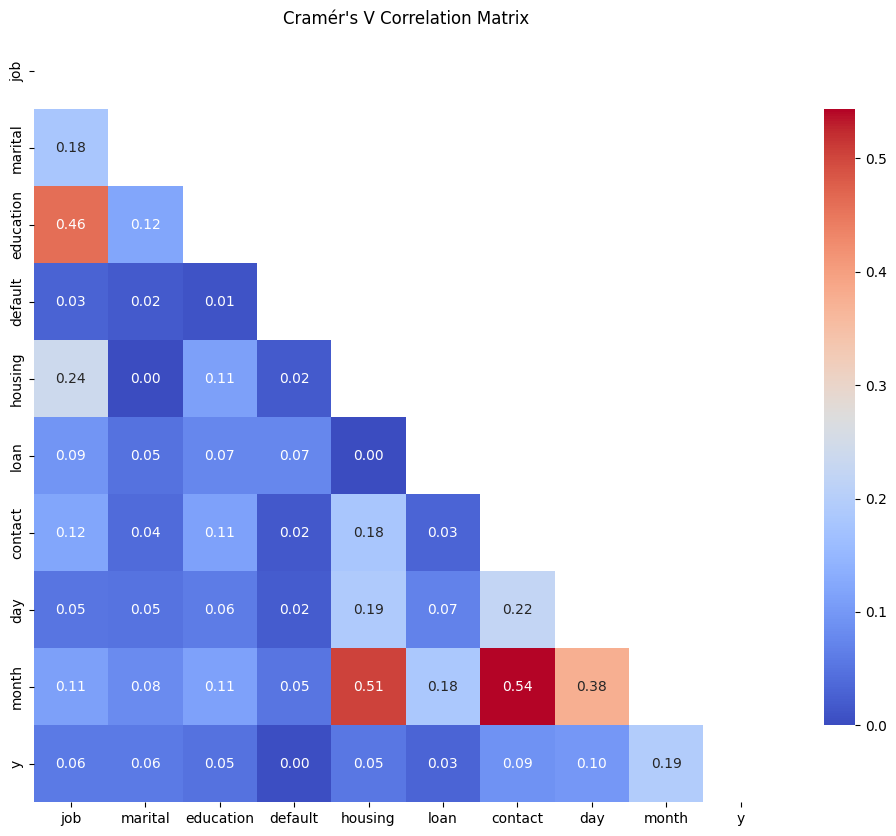

<Figure size 640x480 with 0 Axes>

In [69]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def cramers_v_matrix(df):
    """Compute a matrix of Cramér's V statistics for all pairs of categorical columns in a DataFrame."""
    cols = df.columns
    n = len(cols)
    cv_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cv_matrix[i, j] = cramers_v(df[cols[i]], df[cols[j]])
    return pd.DataFrame(cv_matrix, index=cols, columns=cols)

# Compute Cramér's V matrix
cv_matrix = cramers_v_matrix(df_cat)

# generate mask for the upper triangle
mask = np.triu(np.ones_like(cv_matrix, dtype=bool))

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cv_matrix, annot=True, cmap='coolwarm', #vmin=-1, vmax=1,
            mask=mask, cbar_kws={"shrink": .8},fmt='.2f')

plt.title("Cramér's V Correlation Matrix")
plt.show()

# save fig
plt.savefig('../figs/2_corrmatrix_categorical.pdf')
plt.savefig('../figs/2_corrmatrix_categorical.png')

This is a great figure. Most correlations are very slight, but there are a few stronger correlations, like `contact`:`month`, `housing`:`month`, `job`:`education`, and `day`:`month`. These correlations mostly make sense.

#### What about Scatterplots? <a name='scat'></a>

Scatterplots do not seem to give us much insight. The data points are very dispersed and a pattern does not readily emerge:

In [ ]:
sns.pairplot(data=df,hue='y')

In [ ]:
# reinstate warning labels
import warnings
warnings.filterwarnings("default", module="seaborn")

## Modeling <a name='mod'></a>

### Goals recap

To achieve this project's goals, we have to run models. As a reminder, this project is aiming to predict customer behavior. Specifically, we are training models to determine if a customer will buy a term deposit loan.

We are aiming to achieve ≥81% accuracy with the modeling
  * Use a 5-fold cross validation strategy and take the average performance score.

Bonus goals include:
* Determine which customers are most likely to buy the term deposit loan
  * Which segments of customers should the client prioritize?
* Determine what makes the customer buy the loan
  * Which feature should the startup focus on?

### Data Preparation

#### Define random seed and `test_size`

In [ ]:
seed=rand_gen()
seed

In [ ]:
test_size=0.2
test_size

#### Process categorical and continuous columns

In [ ]:
df.head(3)

In [ ]:
# make copy to preserve our progress
df_modeling=copy.deepcopy(df)

First, let's convert some categorical columns to binary. This will help me keep track of my progress, as I'll be able to clearly see which columns still need to be processed. Some may need to be discretized, like `job` and `education`.

In [ ]:
df_modeling['loan'].value_counts()

In [ ]:
df_modeling['y']=df_modeling['y'].map({'yes': 1, 'no': 0})
df_modeling['default']=df_modeling['default'].map({'yes': 1, 'no': 0})
df_modeling['housing']=df_modeling['housing'].map({'yes': 1, 'no': 0})
df_modeling['loan']=df_modeling['loan'].map({'yes': 1, 'no': 0})

In [ ]:
df_modeling.head(3)

Those are all the binary features. We still have to get the continuous variables separated and have to discretize, or "OneHotEncode" the rest of the categorical columns.

In [ ]:
# define the categorical columns
cat_cols=['job','marital','education','default','housing','loan','contact','month']
df_cat=df_modeling[cat_cols]

In [ ]:
df_cat.head(3)

In [ ]:
# make dataframe of continuous variables

# set of categorical columns
df_cat_set = set(df_cat.columns)
# set of all columns
df_modeling_set = set(df_modeling.columns)

# Find columns that are in df_modeling but not in df_cat
difference = df_modeling_set - df_cat_set

# Convert the set to list and name it the continuous
cont_cols = list(difference)
cont_cols.remove('y')

# print("Columns in DataFrame but not in the list:\n",cont_cols)

df_cont=df_modeling[cont_cols]
df_cont.head(3)

In [ ]:
# convert the categorical columns to the 'category' type
for col in df_cat.columns:
    df_cat.loc[:,col] = df_cat[col].astype('category')

In [ ]:
df_cat.head(3)

In [ ]:
# discretize the categorical columns
already_encoded=['default','housing','loan','day']
columns_to_encode = [col for col in df_cat.columns if col not in already_encoded]
prefixes=columns_to_encode

# apply get_dummies
df_cat=pd.get_dummies(data=df_cat[columns_to_encode],prefix=prefixes,drop_first=True,dtype='int')

# confirm
df_cat.info()

In [ ]:
# add the continuous and categorical columns together
df_x=pd.concat([df_cat,df_cont],axis=1)
df_x.info()

#### Define X and y

In [ ]:
X=df_x
y=df_modeling[[col for col in df_modeling.columns if col == 'y']]

#### `train_test_split`

In [ ]:
# train/test split
X_train, \
X_test, \
y_train, \
y_test = train_test_split(X,
                          y,
                          test_size=test_size,
                          stratify=y,
                          random_state=seed)

### PyCaret

[PyCaret](#https://pycaret.gitbook.io/docs) is a library that helps make it easy to experiment on the performance of different ML algorithms so that we can maximize our time on optimizing the best algorithm.